In [3]:
import numpy as np
import pandas as pd
import string

# This is for making some large tweets to be displayed
pd.options.display.max_colwidth = 100

In [6]:
twitter_data = pd.read_csv("tweets.csv")

C:\Users\behdad\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
twitter_data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [42]:
twitter_data.dtypes

id                 int64
date              object
time              object
timezone          object
user_id            int64
username          object
name              object
tweet             object
mentions          object
urls              object
replies_count      int64
retweets_count     int64
likes_count        int64
hashtags          object
cashtags          object
link              object
retweet             bool
reply_to          object
dtype: object

In [46]:
twitter_data.head(2)

,id,date,time,user_id,username,name,tweet,mentions,urls,replies_count,retweets_count,likes_count,hashtags,link,retweet,reply_to
0,1227843996694667264,2020-02-13,10:06:35,2895859044,hypocoristicon1,Lou,The passengers on flight 752 were killed by the Iranian regime. Their death is 100% their fault.,"['ceindeed', 'jrezaian', 'mrjoncryer']",[],0,0,0,[],https://twitter.com/hypocoristicon1/status/1227843996694667264,False,"[{'user_id': '2895859044', 'username': 'hypocoristicon1'}, {'user_id': '858019254', 'username': ..."
1,1227842194813456384,2020-02-13,09:59:26,3344574413,insomnibrat,Insomnibrat,The ‘worse than expected’ Coronavirus figures coming out of China is the least surprising news s...,[],[],0,0,1,"['#covid19', '#china']",https://twitter.com/insomnibrat/status/1227842194813456384,False,"[{'user_id': '3344574413', 'username': 'insomnibrat'}]"


In [47]:
# del twitter_data['timezone']
# twitter_data.to_csv('twitter_data.csv')

In [103]:
# test_data = twitter_data.filter(['id', 'tweet'], axis=1)
test_data = twitter_data[['tweet']].copy()
test_data = test_data.rename({'tweet': 'SentimentText'}, axis=1)
test_data

,SentimentText
0,The passengers on flight 752 were killed by the Iranian regime. Their death is 100% their fault.
1,The ‘worse than expected’ Coronavirus figures coming out of China is the least surprising news s...
2,And 176 people died on Flight 752.
3,"A memorial will be held on Feb. 16 for 10 year old Rosstin Moghaddam & his mom, Dr. Shakiba Fegh..."
4,"Fund for Canadian victims of Flight #752 shot down in Iran, almost at ONE MILLION dollars. Canad..."
...,...
17609,#BREAKING: Plane which crashed near #Tehran is #Ukraine International #Flight752 which was takin...
17610,BREAKING: Identity of flight that crashed near Tehran is Ukraine International Flight 752
17611,"BREAKING: Plane which crashed near Tehran is Ukraine International Flight 752, which was taking ..."
17612,"Ukraine International Flight 752, 180 on board. https://twitter.com/BNONews/status/121475165282..."


In [104]:
test_data.isna().sum()

SentimentText    0
dtype: int64

In [105]:
rand_indexs = np.random.randint(1,len(test_data),50).tolist()
test_data["SentimentText"][rand_indexs]

4927     Hajizadeh sitting with the families of the victims of #Flight752 talking about Iran becoming a s...
17152                          https://open.spotify.com/playlist/3SuAVvHSuOnM8y8ezTmEnL …\n#UNIDO #Flight752
2596     Halfway reading this article, I'm already crying:\n\nMy father died on Flight 752. Here’s what I...
10259    ‘Human error at time of crisis caused by US adventurism led to disaster’: FM Zarif on Iran’s dow...
10736    خاک عالم بر سر رسانه‌های داخل ایران و روزنامه‌‌نگارانش که تا الان لال بودند. و البته بد نیست از ...
10958                                              ای خدا .........................\n#FlightPS752 #Flight752
8264     Iranian people chanting in streets of Tehran against the regimes policy in the region.\n "No Gaz...
1868     Here's why Iran (and the western media) is not being honest about Ukraine flight 752.\n https://...
14134    The @TownofAjax is holding a vigil at the McLean Community Centre on Monday, January 13th in mem...
15541    Join us in

In [1]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text = text.replace('\n', ' ')
    return text

test_data['Tweet_punct'] = test_data['SentimentText'].apply(lambda x: remove_punct(x))
test_data.head(10)

NameError: name 'test_data' is not defined

In [108]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

test_data['Tweet_tokenized'] = test_data['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
test_data.head()

,SentimentText,Tweet_punct,Tweet_tokenized
0,The passengers on flight 752 were killed by the Iranian regime. Their death is 100% their fault.,The passengers on flight were killed by the Iranian regime Their death is their fault,"[the, passengers, on, flight, were, killed, by, the, iranian, regime, their, death, is, their, f..."
1,The ‘worse than expected’ Coronavirus figures coming out of China is the least surprising news s...,The ‘worse than expected’ Coronavirus figures coming out of China is the least surprising news s...,"[the, worse, than, expected, coronavirus, figures, coming, out, of, china, is, the, least, surpr..."
2,And 176 people died on Flight 752.,And people died on Flight,"[and, people, died, on, flight, ]"
3,"A memorial will be held on Feb. 16 for 10 year old Rosstin Moghaddam & his mom, Dr. Shakiba Fegh...",A memorial will be held on Feb for year old Rosstin Moghaddam his mom Dr Shakiba Feghahati in...,"[a, memorial, will, be, held, on, feb, for, year, old, rosstin, moghaddam, his, mom, dr, shakiba..."
4,"Fund for Canadian victims of Flight #752 shot down in Iran, almost at ONE MILLION dollars. Canad...",Fund for Canadian victims of Flight shot down in Iran almost at ONE MILLION dollars Canadian Go...,"[fund, for, canadian, victims, of, flight, shot, down, in, iran, almost, at, one, million, dolla..."


In [109]:
stopword = nltk.corpus.stopwords.words('english')

In [111]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
test_data['Tweet_nonstop'] = test_data['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
test_data.head(10)

,SentimentText,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,The passengers on flight 752 were killed by the Iranian regime. Their death is 100% their fault.,The passengers on flight were killed by the Iranian regime Their death is their fault,"[the, passengers, on, flight, were, killed, by, the, iranian, regime, their, death, is, their, f...","[passengers, flight, killed, iranian, regime, death, fault]"
1,The ‘worse than expected’ Coronavirus figures coming out of China is the least surprising news s...,The ‘worse than expected’ Coronavirus figures coming out of China is the least surprising news s...,"[the, worse, than, expected, coronavirus, figures, coming, out, of, china, is, the, least, surpr...","[worse, expected, coronavirus, figures, coming, china, least, surprising, news, since, iran, cla..."
2,And 176 people died on Flight 752.,And people died on Flight,"[and, people, died, on, flight, ]","[people, died, flight, ]"
3,"A memorial will be held on Feb. 16 for 10 year old Rosstin Moghaddam & his mom, Dr. Shakiba Fegh...",A memorial will be held on Feb for year old Rosstin Moghaddam his mom Dr Shakiba Feghahati in...,"[a, memorial, will, be, held, on, feb, for, year, old, rosstin, moghaddam, his, mom, dr, shakiba...","[memorial, held, feb, year, old, rosstin, moghaddam, mom, dr, shakiba, feghahati, vaughan, ontar..."
4,"Fund for Canadian victims of Flight #752 shot down in Iran, almost at ONE MILLION dollars. Canad...",Fund for Canadian victims of Flight shot down in Iran almost at ONE MILLION dollars Canadian Go...,"[fund, for, canadian, victims, of, flight, shot, down, in, iran, almost, at, one, million, dolla...","[fund, canadian, victims, flight, shot, iran, almost, one, million, dollars, canadian, govt, mat..."
5,فراموش نکردیم؛ فراموش نمیکنیم #هواپیمای_اوکراینی #Flight752,فراموش نکردیم؛ فراموش نمیکنیم هواپیمایاوکراینی Flight,"[فراموش, نکردیم, فراموش, نمیکنیم, هواپیمایاوکراینی, flight]","[فراموش, نکردیم, فراموش, نمیکنیم, هواپیمایاوکراینی, flight]"
6,"این رشته توییت را ببینید. از شروع حادثه هواپیما... واقعا چرا ایران همکاری نمی کنه؟ ""چه ریگی به ک...",این رشته توییت را ببینید از شروع حادثه هواپیما واقعا چرا ایران همکاری نمی کنه؟ چه ریگی به کفشش ه...,"[این, رشته, توییت, را, ببینید, از, شروع, حادثه, هواپیما, واقعا, چرا, ایران, همکاری, نمی, کنه, چه...","[این, رشته, توییت, را, ببینید, از, شروع, حادثه, هواپیما, واقعا, چرا, ایران, همکاری, نمی, کنه, چه..."
7,🧵 \n\nImportant timeline of flight #PS752 & the fate of the black boxes \n\n🛑 It's been 5 weeks ...,🧵 \n\nImportant timeline of flight PS the fate of the black boxes \n\n🛑 Its been weeks since I...,"[, important, timeline, of, flight, ps, the, fate, of, the, black, boxes, its, been, weeks, sinc...","[, important, timeline, flight, ps, fate, black, boxes, weeks, since, iran, shot, ps, killing, p..."
8,[on question about whether Ukraine will seek further compensation from Iran for the shooting of ...,on question about whether Ukraine will seek further compensation from Iran for the shooting of U...,"[on, question, about, whether, ukraine, will, seek, further, compensation, from, iran, for, the,...","[question, whether, ukraine, seek, compensation, iran, shooting, uia, flight, sort, stunning, qu..."
9,An Iranian couple is being denied the chance to visit their surviving daughter in Texas after he...,An Iranian couple is being denied the chance to visit their surviving daughter in Texas after he...,"[an, iranian, couple, is, being, denied, the, chance, to, visit, their, surviving, daughter, in,...","[iranian, couple, denied, chance, visit, surviving, daughter, texas, sister, killed, iranian, fo..."


In [112]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

test_data['Tweet_stemmed'] = test_data['Tweet_nonstop'].apply(lambda x: stemming(x))
test_data.head()

,SentimentText,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,The passengers on flight 752 were killed by the Iranian regime. Their death is 100% their fault.,The passengers on flight were killed by the Iranian regime Their death is their fault,"[the, passengers, on, flight, were, killed, by, the, iranian, regime, their, death, is, their, f...","[passengers, flight, killed, iranian, regime, death, fault]","[passeng, flight, kill, iranian, regim, death, fault]"
1,The ‘worse than expected’ Coronavirus figures coming out of China is the least surprising news s...,The ‘worse than expected’ Coronavirus figures coming out of China is the least surprising news s...,"[the, worse, than, expected, coronavirus, figures, coming, out, of, china, is, the, least, surpr...","[worse, expected, coronavirus, figures, coming, china, least, surprising, news, since, iran, cla...","[wors, expect, coronaviru, figur, come, china, least, surpris, news, sinc, iran, claim, mechan, ..."
2,And 176 people died on Flight 752.,And people died on Flight,"[and, people, died, on, flight, ]","[people, died, flight, ]","[peopl, die, flight, ]"
3,"A memorial will be held on Feb. 16 for 10 year old Rosstin Moghaddam & his mom, Dr. Shakiba Fegh...",A memorial will be held on Feb for year old Rosstin Moghaddam his mom Dr Shakiba Feghahati in...,"[a, memorial, will, be, held, on, feb, for, year, old, rosstin, moghaddam, his, mom, dr, shakiba...","[memorial, held, feb, year, old, rosstin, moghaddam, mom, dr, shakiba, feghahati, vaughan, ontar...","[memori, held, feb, year, old, rosstin, moghaddam, mom, dr, shakiba, feghahati, vaughan, ontario..."
4,"Fund for Canadian victims of Flight #752 shot down in Iran, almost at ONE MILLION dollars. Canad...",Fund for Canadian victims of Flight shot down in Iran almost at ONE MILLION dollars Canadian Go...,"[fund, for, canadian, victims, of, flight, shot, down, in, iran, almost, at, one, million, dolla...","[fund, canadian, victims, flight, shot, iran, almost, one, million, dollars, canadian, govt, mat...","[fund, canadian, victim, flight, shot, iran, almost, one, million, dollar, canadian, govt, match..."


In [113]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

test_data['Tweet_lemmatized'] = test_data['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
test_data.head()

,SentimentText,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,The passengers on flight 752 were killed by the Iranian regime. Their death is 100% their fault.,The passengers on flight were killed by the Iranian regime Their death is their fault,"[the, passengers, on, flight, were, killed, by, the, iranian, regime, their, death, is, their, f...","[passengers, flight, killed, iranian, regime, death, fault]","[passeng, flight, kill, iranian, regim, death, fault]","[passenger, flight, killed, iranian, regime, death, fault]"
1,The ‘worse than expected’ Coronavirus figures coming out of China is the least surprising news s...,The ‘worse than expected’ Coronavirus figures coming out of China is the least surprising news s...,"[the, worse, than, expected, coronavirus, figures, coming, out, of, china, is, the, least, surpr...","[worse, expected, coronavirus, figures, coming, china, least, surprising, news, since, iran, cla...","[wors, expect, coronaviru, figur, come, china, least, surpris, news, sinc, iran, claim, mechan, ...","[worse, expected, coronavirus, figure, coming, china, least, surprising, news, since, iran, clai..."
2,And 176 people died on Flight 752.,And people died on Flight,"[and, people, died, on, flight, ]","[people, died, flight, ]","[peopl, die, flight, ]","[people, died, flight, ]"
3,"A memorial will be held on Feb. 16 for 10 year old Rosstin Moghaddam & his mom, Dr. Shakiba Fegh...",A memorial will be held on Feb for year old Rosstin Moghaddam his mom Dr Shakiba Feghahati in...,"[a, memorial, will, be, held, on, feb, for, year, old, rosstin, moghaddam, his, mom, dr, shakiba...","[memorial, held, feb, year, old, rosstin, moghaddam, mom, dr, shakiba, feghahati, vaughan, ontar...","[memori, held, feb, year, old, rosstin, moghaddam, mom, dr, shakiba, feghahati, vaughan, ontario...","[memorial, held, feb, year, old, rosstin, moghaddam, mom, dr, shakiba, feghahati, vaughan, ontar..."
4,"Fund for Canadian victims of Flight #752 shot down in Iran, almost at ONE MILLION dollars. Canad...",Fund for Canadian victims of Flight shot down in Iran almost at ONE MILLION dollars Canadian Go...,"[fund, for, canadian, victims, of, flight, shot, down, in, iran, almost, at, one, million, dolla...","[fund, canadian, victims, flight, shot, iran, almost, one, million, dollars, canadian, govt, mat...","[fund, canadian, victim, flight, shot, iran, almost, one, million, dollar, canadian, govt, match...","[fund, canadian, victim, flight, shot, iran, almost, one, million, dollar, canadian, govt, match..."


In [114]:
# We are gonna find what emoticons are used in our dataset
import re

tweets_text = test_data.SentimentText.str.cat()
emos = set(re.findall(r" ([xX:;][-']?.) ",tweets_text))
emos_count = []
for emo in emos:
    emos_count.append((tweets_text.count(emo), emo))
sorted(emos_count,reverse=True)

[(3652, ': '),
 (17, 'xo'),
 (13, ':('),
 (8, ':)'),
 (5, '::'),
 (2, ';('),
 (2, ':👇'),
 (1, 'X.'),
 (1, ':|'),
 (1, ':-(')]

In [115]:
HAPPY_EMO = r" ([xX;:]-?[dD)]|:-?[\)]|[;:][pP]) "
SAD_EMO = r" (:'?[/|\(]) "
print("Happy emoticons:", set(re.findall(HAPPY_EMO, tweets_text)))
print("Sad emoticons:", set(re.findall(SAD_EMO, tweets_text)))

Happy emoticons: {':)'}
Sad emoticons: {':(', ':|'}


In [116]:
import nltk
from nltk.tokenize import word_tokenize

# Uncomment this line if you haven't downloaded punkt before
# or just run it as it is and uncomment it if you got an error.
# nltk.download('punkt')

def most_used_words(text):
    tokens = word_tokenize(text)
    frequency_dist = nltk.FreqDist(tokens)
    print("There is %d different words" % len(set(tokens)))
    return sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)

In [117]:
# nltk.download("words")
words = set(nltk.corpus.words.words())

test_text_data = " ".join(w for w in nltk.wordpunct_tokenize(test_data.SentimentText.str.cat()) \
         if w.lower() in words or not w.isalpha())

In [118]:
most_used_words(test_text_data)[:10]

There is 22144 different words


['-', '.', '/', '#', 'the', ':', '752', 'of', ',', '//']

In [119]:
from nltk.corpus import stopwords

# nltk.download("stopwords")

mw = most_used_words(train_data.SentimentText.str.cat())
most_words = []
for w in mw:
    if len(most_words) == 1000:
        break
    if w in stopwords.words("english"):
        continue
    else:
        most_words.append(w)

There is 133967 different words


In [120]:
# What we did is to filter only non stop words.
# We will now get a look to the top 1000 words
sorted(most_words)

['!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 '(',
 ')',
 '*',
 '*hugs*',
 '*sigh*',
 '+',
 ',',
 '-',
 '--',
 '.',
 '..',
 '...',
 '/',
 '1',
 '10',
 '100',
 '12',
 '1st',
 '2',
 '20',
 '2nd',
 '3',
 '30',
 '30SECONDSTOMARS',
 '4',
 '5',
 '6',
 '7',
 '8',
 ':',
 ';',
 '=',
 '?',
 '@',
 'A',
 'AND',
 'Ah',
 'AlexAllTimeLow',
 'All',
 'Also',
 'Alyssa_Milano',
 'Am',
 'And',
 'Are',
 'As',
 'At',
 'Aw',
 'Awesome',
 'Aww',
 'Awww',
 'BSB',
 'Birthday',
 'But',
 'Ca',
 'Can',
 'Chris',
 'Come',
 'Congrats',
 'Cool',
 'D',
 'DM',
 'DO',
 'Damn',
 'Day',
 'Did',
 'Do',
 'Enjoy',
 'FF',
 'Follow',
 'FollowFriday',
 'For',
 'Friday',
 'Get',
 'Glad',
 'Go',
 'God',
 'Good',
 'Got',
 'Great',
 'Had',
 'Haha',
 'Happy',
 'Have',
 'He',
 'Hello',
 'Hey',
 'Hi',
 'Hope',
 'How',
 'I',
 'IS',
 'IT',
 'If',
 'Im',
 'In',
 'Is',
 'It',
 'Its',
 'July',
 'June',
 'Just',
 'Keep',
 'LA',
 'LMAO',
 'LOL',
 'LOVE',
 'Let',
 'Like',
 'Lol',
 'London',
 'Love',
 'ME',


In [121]:
# I'm defining this function to use it in the 
# Data Preparation Phase
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

# nltk.download('wordnet')
def stem_tokenize(text):
    stemmer = SnowballStemmer("english")
    stemmer = WordNetLemmatizer()
    return [stemmer.lemmatize(token) for token in word_tokenize(text)]

def lemmatize_tokenize(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in word_tokenize(text)]

In [122]:
test_data.head()

,SentimentText,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,The passengers on flight 752 were killed by the Iranian regime. Their death is 100% their fault.,The passengers on flight were killed by the Iranian regime Their death is their fault,"[the, passengers, on, flight, were, killed, by, the, iranian, regime, their, death, is, their, f...","[passengers, flight, killed, iranian, regime, death, fault]","[passeng, flight, kill, iranian, regim, death, fault]","[passenger, flight, killed, iranian, regime, death, fault]"
1,The ‘worse than expected’ Coronavirus figures coming out of China is the least surprising news s...,The ‘worse than expected’ Coronavirus figures coming out of China is the least surprising news s...,"[the, worse, than, expected, coronavirus, figures, coming, out, of, china, is, the, least, surpr...","[worse, expected, coronavirus, figures, coming, china, least, surprising, news, since, iran, cla...","[wors, expect, coronaviru, figur, come, china, least, surpris, news, sinc, iran, claim, mechan, ...","[worse, expected, coronavirus, figure, coming, china, least, surprising, news, since, iran, clai..."
2,And 176 people died on Flight 752.,And people died on Flight,"[and, people, died, on, flight, ]","[people, died, flight, ]","[peopl, die, flight, ]","[people, died, flight, ]"
3,"A memorial will be held on Feb. 16 for 10 year old Rosstin Moghaddam & his mom, Dr. Shakiba Fegh...",A memorial will be held on Feb for year old Rosstin Moghaddam his mom Dr Shakiba Feghahati in...,"[a, memorial, will, be, held, on, feb, for, year, old, rosstin, moghaddam, his, mom, dr, shakiba...","[memorial, held, feb, year, old, rosstin, moghaddam, mom, dr, shakiba, feghahati, vaughan, ontar...","[memori, held, feb, year, old, rosstin, moghaddam, mom, dr, shakiba, feghahati, vaughan, ontario...","[memorial, held, feb, year, old, rosstin, moghaddam, mom, dr, shakiba, feghahati, vaughan, ontar..."
4,"Fund for Canadian victims of Flight #752 shot down in Iran, almost at ONE MILLION dollars. Canad...",Fund for Canadian victims of Flight shot down in Iran almost at ONE MILLION dollars Canadian Go...,"[fund, for, canadian, victims, of, flight, shot, down, in, iran, almost, at, one, million, dolla...","[fund, canadian, victims, flight, shot, iran, almost, one, million, dollars, canadian, govt, mat...","[fund, canadian, victim, flight, shot, iran, almost, one, million, dollar, canadian, govt, match...","[fund, canadian, victim, flight, shot, iran, almost, one, million, dollar, canadian, govt, match..."


In [5]:
# test_data.to_csv('flight_test.csv')
test_data=pd.read_csv('flight_test.csv')
test_data.head()

,Unnamed: 0,SentimentText,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,0,The passengers on flight 752 were killed by the Iranian regime. Their death is 100% their fault.,The passengers on flight were killed by the Iranian regime Their death is their fault,"['the', 'passengers', 'on', 'flight', 'were', 'killed', 'by', 'the', 'iranian', 'regime', 'their...","['passengers', 'flight', 'killed', 'iranian', 'regime', 'death', 'fault']","['passeng', 'flight', 'kill', 'iranian', 'regim', 'death', 'fault']","['passenger', 'flight', 'killed', 'iranian', 'regime', 'death', 'fault']"
1,1,The ‘worse than expected’ Coronavirus figures coming out of China is the least surprising news s...,The ‘worse than expected’ Coronavirus figures coming out of China is the least surprising news s...,"['the', 'worse', 'than', 'expected', 'coronavirus', 'figures', 'coming', 'out', 'of', 'china', '...","['worse', 'expected', 'coronavirus', 'figures', 'coming', 'china', 'least', 'surprising', 'news'...","['wors', 'expect', 'coronaviru', 'figur', 'come', 'china', 'least', 'surpris', 'news', 'sinc', '...","['worse', 'expected', 'coronavirus', 'figure', 'coming', 'china', 'least', 'surprising', 'news',..."
2,2,And 176 people died on Flight 752.,And people died on Flight,"['and', 'people', 'died', 'on', 'flight', '']","['people', 'died', 'flight', '']","['peopl', 'die', 'flight', '']","['people', 'died', 'flight', '']"
3,3,"A memorial will be held on Feb. 16 for 10 year old Rosstin Moghaddam & his mom, Dr. Shakiba Fegh...",A memorial will be held on Feb for year old Rosstin Moghaddam his mom Dr Shakiba Feghahati in...,"['a', 'memorial', 'will', 'be', 'held', 'on', 'feb', 'for', 'year', 'old', 'rosstin', 'moghaddam...","['memorial', 'held', 'feb', 'year', 'old', 'rosstin', 'moghaddam', 'mom', 'dr', 'shakiba', 'fegh...","['memori', 'held', 'feb', 'year', 'old', 'rosstin', 'moghaddam', 'mom', 'dr', 'shakiba', 'feghah...","['memorial', 'held', 'feb', 'year', 'old', 'rosstin', 'moghaddam', 'mom', 'dr', 'shakiba', 'fegh..."
4,4,"Fund for Canadian victims of Flight #752 shot down in Iran, almost at ONE MILLION dollars. Canad...",Fund for Canadian victims of Flight shot down in Iran almost at ONE MILLION dollars Canadian Go...,"['fund', 'for', 'canadian', 'victims', 'of', 'flight', 'shot', 'down', 'in', 'iran', 'almost', '...","['fund', 'canadian', 'victims', 'flight', 'shot', 'iran', 'almost', 'one', 'million', 'dollars',...","['fund', 'canadian', 'victim', 'flight', 'shot', 'iran', 'almost', 'one', 'million', 'dollar', '...","['fund', 'canadian', 'victim', 'flight', 'shot', 'iran', 'almost', 'one', 'million', 'dollar', '..."


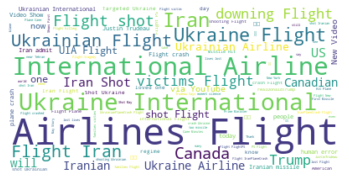

<Figure size 432x288 with 0 Axes>

In [9]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
# Start with one review:
text = " ".join(tweet for tweet in test_data.Tweet_punct)
# lower max_font_size, change the maximum number of word and lighten the background:
stopwords = set(STOPWORDS)
# stopwords.add(search_modifier)
wordcloud = WordCloud(max_font_size=50, max_words=100,stopwords= stopwords ,  background_color="white").generate(text)


plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig('1.png')

In [55]:
train_data = pd.read_csv("train.csv", encoding='ISO-8859-1')
train_data

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL friend.............
1,2,0,I missed the New Moon trailer...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2...
4,5,0,i think mi bf is cheating on me!!! T_T
...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hope you're able to find something.
99985,99997,1,"@cupcake__ arrrr we both replied to each other over different tweets at the same time , i'll se..."
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had more fun with me.


# Visualize the tweets

In [56]:
# We will now take a look at random tweets
# to gain more insights

rand_indexs = np.random.randint(1,len(train_data),50).tolist()
train_data["SentimentText"][rand_indexs]

1141                                                                    amy hit me cos i call her drink lady
34627    @akomuzikera It seemed you were quite involved in the action #frenchopen and that can be quite f...
65336                                     @BreeOlson9 awwww i feel sooooo bad it went so bad tonite for you 
84679                                                                              @atebits Hah! Your late! 
53228                                                        @B_JIZZLE  awww yay thats very soon... weeeeee 
72076                  @angelandz My favorite part of Muppet Babies was the Mom. You only ever saw her legs 
15397    *SHe said its not about you its about #TwitterTakeover * shameless #TwitterTakever plug. Why i k...
14292                        ....outside is so Lovely...too bad i cant stay out longer bc of the way i feel 
37887                                                                @amazingkelsey didn't you just move??? 
97877              

### Emoticons
The internet language includes so many emoticons, people also tend to create their own, so we will first analyze the emoticons included in our dataset, try to classify them as happy and said, and make sure that our model know about them.

In [57]:
# We are gonna find what emoticons are used in our dataset
import re

tweets_text = train_data.SentimentText.str.cat()
emos = set(re.findall(r" ([xX:;][-']?.) ",tweets_text))
emos_count = []
for emo in emos:
    emos_count.append((tweets_text.count(emo), emo))
sorted(emos_count,reverse=True)

[(3281, ':/'),
 (2874, 'x '),
 (2626, ': '),
 (1339, 'x@'),
 (1214, 'xx'),
 (1162, 'xa'),
 (984, ';3'),
 (887, 'xp'),
 (842, 'xo'),
 (713, ';)'),
 (483, 'xe'),
 (431, ';I'),
 (353, ';.'),
 (254, 'xD'),
 (251, 'x.'),
 (245, '::'),
 (234, 'X '),
 (217, ';t'),
 (209, ';s'),
 (185, ':O'),
 (176, ':3'),
 (166, ';D'),
 (159, ":'"),
 (157, 'XD'),
 (146, 'x3'),
 (142, ':p'),
 (126, ":'("),
 (118, ':@'),
 (117, 'xh'),
 (117, ':S'),
 (109, 'xm'),
 (104, ';p'),
 (104, ';-)'),
 (92, ':|'),
 (91, 'x,'),
 (89, ';P'),
 (76, 'xd'),
 (75, ';o'),
 (75, ';d'),
 (71, ':o'),
 (65, 'XX'),
 (63, ':L'),
 (59, 'Xx'),
 (59, ':1'),
 (58, ':]'),
 (57, ':s'),
 (56, ':0'),
 (54, 'XO'),
 (44, ';;'),
 (43, ';('),
 (38, ':-D'),
 (37, 'xk'),
 (36, 'XT'),
 (35, 'x?'),
 (35, 'x)'),
 (34, 'x2'),
 (33, ';/'),
 (32, 'x:'),
 (32, ':\\'),
 (31, 'x-'),
 (27, 'Xo'),
 (27, 'XP'),
 (27, ':-/'),
 (26, ':-P'),
 (25, ':*'),
 (23, 'xX'),
 (22, ":')"),
 (17, 'xP'),
 (16, ':['),
 (16, ':-p'),
 (14, 'x]'),
 (14, 'XM'),
 (13, ':-O'),
 (1

In [58]:
HAPPY_EMO = r" ([xX;:]-?[dD)]|:-?[\)]|[;:][pP]) "
SAD_EMO = r" (:'?[/|\(]) "
print("Happy emoticons:", set(re.findall(HAPPY_EMO, tweets_text)))
print("Sad emoticons:", set(re.findall(SAD_EMO, tweets_text)))

Happy emoticons: {'xd', ';p', 'XD', ';)', ';D', ':D', ':p', 'x)', ';-D', ':-D', ';-)', ';P', 'xD', ':d', ';d'}
Sad emoticons: {':(', ':|', ':/', ":'("}


In [59]:
import nltk
from nltk.tokenize import word_tokenize

# Uncomment this line if you haven't downloaded punkt before
# or just run it as it is and uncomment it if you got an error.
# nltk.download('punkt')

def most_used_words(text):
    tokens = word_tokenize(text)
    frequency_dist = nltk.FreqDist(tokens)
    print("There is %d different words" % len(set(tokens)))
    return sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [60]:
most_used_words(train_data.SentimentText.str.cat())[:100]

There is 133967 different words


['@',
 '!',
 '.',
 'I',
 ',',
 'to',
 'the',
 'you',
 '?',
 'a',
 'it',
 'i',
 '...',
 ';',
 'and',
 '&',
 'my',
 'for',
 'is',
 'that',
 "'s",
 "n't",
 'in',
 'of',
 'me',
 'have',
 'on',
 'quot',
 "'m",
 'so',
 ':',
 'but',
 '#',
 'do',
 'was',
 'be',
 'not',
 'your',
 'are',
 'just',
 'with',
 'like',
 '-',
 'at',
 'too',
 'get',
 'good',
 'u',
 'up',
 'know',
 'all',
 'this',
 'now',
 'no',
 'we',
 'out',
 ')',
 'love',
 'can',
 '(',
 'what',
 'one',
 'will',
 'lol',
 'go',
 'about',
 'did',
 "'ll",
 'got',
 'amp',
 'there',
 'day',
 'http',
 'see',
 "'re",
 'if',
 'time',
 'they',
 'think',
 'as',
 'when',
 'from',
 'You',
 'It',
 'going',
 'really',
 'am',
 'work',
 'well',
 'had',
 'would',
 'how',
 'he',
 'here',
 'some',
 'thanks',
 'back',
 'im',
 'haha',
 'or']

# Stop words
What we can see is that stop words are the most used, but in fact they don't help us determine if a tweet is happy/sad, however, they are consuming memory and they are making the learning process slower, so we really need to get rid of them.

In [61]:
from nltk.corpus import stopwords

# nltk.download("stopwords")

mw = most_used_words(train_data.SentimentText.str.cat())
most_words = []
for w in mw:
    if len(most_words) == 1000:
        break
    if w in stopwords.words("english"):
        continue
    else:
        most_words.append(w)

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
There is 133967 different words


In [62]:
# What we did is to filter only non stop words.
# We will now get a look to the top 1000 words
sorted(most_words)

['!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 '(',
 ')',
 '*',
 '*hugs*',
 '*sigh*',
 '+',
 ',',
 '-',
 '--',
 '.',
 '..',
 '...',
 '/',
 '1',
 '10',
 '100',
 '12',
 '1st',
 '2',
 '20',
 '2nd',
 '3',
 '30',
 '30SECONDSTOMARS',
 '4',
 '5',
 '6',
 '7',
 '8',
 ':',
 ';',
 '=',
 '?',
 '@',
 'A',
 'AND',
 'Ah',
 'AlexAllTimeLow',
 'All',
 'Also',
 'Alyssa_Milano',
 'Am',
 'And',
 'Are',
 'As',
 'At',
 'Aw',
 'Awesome',
 'Aww',
 'Awww',
 'BSB',
 'Birthday',
 'But',
 'Ca',
 'Can',
 'Chris',
 'Come',
 'Congrats',
 'Cool',
 'D',
 'DM',
 'DO',
 'Damn',
 'Day',
 'Did',
 'Do',
 'Enjoy',
 'FF',
 'Follow',
 'FollowFriday',
 'For',
 'Friday',
 'Get',
 'Glad',
 'Go',
 'God',
 'Good',
 'Got',
 'Great',
 'Had',
 'Haha',
 'Happy',
 'Have',
 'He',
 'Hello',
 'Hey',
 'Hi',
 'Hope',
 'How',
 'I',
 'IS',
 'IT',
 'If',
 'Im',
 'In',
 'Is',
 'It',
 'Its',
 'July',
 'June',
 'Just',
 'Keep',
 'LA',
 'LMAO',
 'LOL',
 'LOVE',
 'Let',
 'Like',
 'Lol',
 'London',
 'Love',
 'ME',


## Stemming
You should have noticed something, right? There are words that have the same meaning, but written in a different manner, sometimes in the plural and sometimes with a suffix (ing, es ...), this will make our model think that they are different words and also make our vocabulary bigger (waste of memory and time for the learning process). The solution is to reduce those words with the same root, this is called stemming.

In [64]:
# I'm defining this function to use it in the 
# Data Preparation Phase
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

# nltk.download('wordnet')
def stem_tokenize(text):
    stemmer = SnowballStemmer("english")
    stemmer = WordNetLemmatizer()
    return [stemmer.lemmatize(token) for token in word_tokenize(text)]

def lemmatize_tokenize(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in word_tokenize(text)]

[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


## Bag of Words
We are going to use the Bag of Words algorithm, which basically takes a text as input, extract words from it (this is our vocabulary) to use them in the vectorization process. When a tweet comes in, it will vectorize it by counting the number of occurrences of each word in our vocabulary.

For example, we have this two tweets: "I learned a lot today" and "hahaha I got you".

tweet / words	I	learned	a	lot	today	hahaha	got	you

first	1	1	1	1	1	0	0	0

second	1	0	0	0	0	1	1	1

We first extract the words present in the two tweets, then for each tweet we count the occurrences of each word in our vocabulary.

This is the simplest form of the Bag of Words algorithm, however, there is other variants, we are gonna use the TF-IDF (Term Frequency - Inverse Document Frequency) variant. You can read about it in the chapter I have provided in the beginning or in the official doc of scikit-learn here

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

## Building the pipeline
It's always a good practice to make a pipeline of transformation for your data, it will make the process of data transformation really easy and reusable. We will implement a pipeline for transforming our tweets to something that our ML models can digest (vectors).

In [66]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline

In [67]:
# We need to do some preprocessing of the tweets.
# We will delete useless strings (like @, # ...)
# because we think that they will not help
# in determining if the person is Happy/Sad

class TextPreProc(BaseEstimator,TransformerMixin):
    def __init__(self, use_mention=False):
        self.use_mention = use_mention
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # We can choose between keeping the mentions
        # or deleting them
        if self.use_mention:
            X = X.str.replace(r"@[a-zA-Z0-9_]* ", " @tags ")
        else:
            X = X.str.replace(r"@[a-zA-Z0-9_]* ", "")
            
        # Keeping only the word after the #
        X = X.str.replace("#", "")
        X = X.str.replace(r"[-\.\n]", "")
        # Removing HTML garbage
        X = X.str.replace(r"&\w+;", "")
        # Removing links
        X = X.str.replace(r"https?://\S*", "")
        # replace repeated letters with only two occurences
        # heeeelllloooo => heelloo
        X = X.str.replace(r"(.)\1+", r"\1\1")
        # mark emoticons as happy or sad
        X = X.str.replace(HAPPY_EMO, " happyemoticons ")
        X = X.str.replace(SAD_EMO, " sademoticons ")
        X = X.str.lower()
        return X

In [68]:
# This is the pipeline that will transform our tweets to something eatable.
# You can see that we are using our previously defined stemmer, it will
# take care of the stemming process.
# For stop words, we let the inverse document frequency do the job
from sklearn.model_selection import train_test_split

sentiments = train_data['Sentiment']
tweets = train_data['SentimentText']

# I get those parameters from the 'Fine tune the model' part
vectorizer = TfidfVectorizer(tokenizer=lemmatize_tokenize, ngram_range=(1,2))
pipeline = Pipeline([
    ('text_pre_processing', TextPreProc(use_mention=True)),
    ('vectorizer', vectorizer),
])

# Let's split our data into learning set and testing set
# This process is done to test the efficency of our model at the end.
# You shouldn't look at the test data only after choosing the final model
learn_data, test_data, sentiments_learning, sentiments_test = train_test_split(tweets, sentiments, test_size=0.3)

# This will tranform our learning data from simple text to vector
# by going through the preprocessing tranformer.
learning_data = pipeline.fit_transform(learn_data)

## Select a model
When we have our data ready to be processed by ML models, the question we should ask is which model to use?

The answer varies depending on the problem and data, for example, it's known that Naive Bias has proven good efficacy against Text Based Problems.

A good way to choose a model is to try different candidate, evaluate them using cross validation, then chose the best one which will be later tested against our test data.

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

lr = LogisticRegression()
bnb = BernoulliNB()
mnb = MultinomialNB()

models = {
    'logitic regression': lr,
    'bernoulliNB': bnb,
    'multinomialNB': mnb,
}

for model in models.keys():
    scores = cross_val_score(models[model], learning_data, sentiments_learning, scoring="f1", cv=10)
    print("===", model, "===")
    print("scores = ", scores)
    print("mean = ", scores.mean())
    print("variance = ", scores.var())
    models[model].fit(learning_data, sentiments_learning)
    print("score on the learning data (accuracy) = ", accuracy_score(models[model].predict(learning_data), sentiments_learning))
    print("")

C:\Users\behdad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


=== logitic regression ===
scores =  [0.81282021 0.80616793 0.81287678 0.80989552 0.81833616 0.81911344
 0.81502188 0.81014194 0.80581591 0.80997337]
mean =  0.812016313907642
variance =  1.855630084283851e-05
score on the learning data (accuracy) =  0.8708280946393874

=== bernoulliNB ===
scores =  [0.79164733 0.78291647 0.78967136 0.78799815 0.78737038 0.79004883
 0.78600679 0.78690841 0.78024807 0.78810671]
mean =  0.7870922490678455
variance =  1.035610425732371e-05
score on the learning data (accuracy) =  0.900888672991199

=== multinomialNB ===
scores =  [0.81163557 0.8011988  0.81219404 0.80853416 0.80920102 0.81411817
 0.81128708 0.80437207 0.80408707 0.80967778]
mean =  0.8086305760064489
variance =  1.5433980715868063e-05
score on the learning data (accuracy) =  0.8980883529546234



Fine tune the model
I'm going to use the GridSearchCV to choose the best parameters to use.

What the GridSearchCV does is trying different set of parameters, and for each one, it runs a cross validation and estimate the score. At the end we can see what are the best parameter and use them to build a better classifier.

In [70]:
from sklearn.model_selection import GridSearchCV

grid_search_pipeline = Pipeline([
    ('text_pre_processing', TextPreProc()),
    ('vectorizer', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

params = [
    {
        'text_pre_processing__use_mention': [True, False],
        'vectorizer__max_features': [1000, 2000, 5000, 10000, 20000, None],
        'vectorizer__ngram_range': [(1,1), (1,2)],
    },
]
grid_search = GridSearchCV(grid_search_pipeline, params, cv=5, scoring='f1')
grid_search.fit(learn_data, sentiments_learning)
print(grid_search.best_params_)

{'text_pre_processing__use_mention': True, 'vectorizer__max_features': None, 'vectorizer__ngram_range': (1, 2)}


Test
Testing our model against data other than the data used for training our model will show how well the model is generalising on new data.

Note
We shouldn't test to choose the model, this will only let us confirm that the choosen model is doing well.

In [71]:
mnb.fit(learning_data, sentiments_learning)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [72]:
testing_data = pipeline.transform(test_data)
mnb.score(testing_data, sentiments_test)

0.7534753475347534

In [132]:
# Predecting on the test.csv
sub_data = pd.read_csv("flight_test.csv", encoding='ISO-8859-1')
sub_learning = pipeline.transform(sub_data.SentimentText)
sub = pd.DataFrame(sub_data.SentimentText, columns=("SentimentText", "Sentiment"))
sub["Sentiment"] = mnb.predict(sub_learning)
sub.head(10)

,SentimentText,Sentiment
0,The passengers on flight 752 were killed by the Iranian regime. Their death is 100% their fault.,0
1,The âworse than expectedâ Coronavirus figures coming out of China is the least surprising ne...,0
2,And 176 people died on Flight 752.,0
3,"A memorial will be held on Feb. 16 for 10 year old Rosstin Moghaddam & his mom, Dr. Shakiba Fegh...",1
4,"Fund for Canadian victims of Flight #752 shot down in Iran, almost at ONE MILLION dollars. Canad...",1
5,ÙØ±Ø§Ù ÙØ´ ÙÚ©Ø±Ø¯ÛÙ Ø ÙØ±Ø§Ù ÙØ´ ÙÙ ÛÚ©ÙÛÙ #ÙÙØ§Ù¾ÛÙ Ø§Û_Ø§ÙÚ©Ø±Ø§ÛÙÛ #Flig...,1
6,Ø§ÛÙ Ø±Ø´ØªÙ ØªÙÛÛØª Ø±Ø§ Ø¨Ø¨ÛÙÛØ¯. Ø§Ø² Ø´Ø±ÙØ¹ Ø­Ø§Ø¯Ø«Ù ÙÙØ§Ù¾ÛÙ Ø§... ÙØ§ÙØ...,1
7,ð§µ \n\nImportant timeline of flight #PS752 & the fate of the black boxes \n\nð It's been 5 ...,0
8,[on question about whether Ukraine will seek further compensation from Iran for the shooting of ...,1
9,An Iranian couple is being denied the chance to visit their surviving daughter in Texas after he...,0


In [131]:
# Predecting on the test.csv
sub_data = pd.read_csv("flight_test.csv", encoding='ISO-8859-1')
sub_learning = pipeline.transform(sub_data.Tweet_stemmed)
sub = pd.DataFrame(sub_data.SentimentText, columns=("SentimentText", "Sentiment"))
sub["Sentiment"] = mnb.predict(sub_learning)
sub.head(10)

,SentimentText,Sentiment
0,The passengers on flight 752 were killed by the Iranian regime. Their death is 100% their fault.,1
1,The âworse than expectedâ Coronavirus figures coming out of China is the least surprising ne...,1
2,And 176 people died on Flight 752.,1
3,"A memorial will be held on Feb. 16 for 10 year old Rosstin Moghaddam & his mom, Dr. Shakiba Fegh...",1
4,"Fund for Canadian victims of Flight #752 shot down in Iran, almost at ONE MILLION dollars. Canad...",1
5,ÙØ±Ø§Ù ÙØ´ ÙÚ©Ø±Ø¯ÛÙ Ø ÙØ±Ø§Ù ÙØ´ ÙÙ ÛÚ©ÙÛÙ #ÙÙØ§Ù¾ÛÙ Ø§Û_Ø§ÙÚ©Ø±Ø§ÛÙÛ #Flig...,1
6,Ø§ÛÙ Ø±Ø´ØªÙ ØªÙÛÛØª Ø±Ø§ Ø¨Ø¨ÛÙÛØ¯. Ø§Ø² Ø´Ø±ÙØ¹ Ø­Ø§Ø¯Ø«Ù ÙÙØ§Ù¾ÛÙ Ø§... ÙØ§ÙØ...,1
7,ð§µ \n\nImportant timeline of flight #PS752 & the fate of the black boxes \n\nð It's been 5 ...,1
8,[on question about whether Ukraine will seek further compensation from Iran for the shooting of ...,1
9,An Iranian couple is being denied the chance to visit their surviving daughter in Texas after he...,1


In [74]:
# Just run it
model = MultinomialNB()
model.fit(learning_data, sentiments_learning)
tweet = pd.Series([input(),])
tweet = pipeline.transform(tweet)
proba = model.predict_proba(tweet)[0]
print("The probability that this tweet is sad is:", proba[0])
print("The probability that this tweet is happy is:", proba[1])

i have to work late
The probability that this tweet is sad is: 0.7942232252841442
The probability that this tweet is happy is: 0.20577677471585432
